In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import PolynomialFeatures as PF

%matplotlib inline

df = pd.read_csv('merged_meteo.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 10 columns):
Unnamed: 0                   75 non-null int64
Year                         75 non-null int64
month                        75 non-null int64
tmax_degC                    75 non-null float64
time_degC                    75 non-null float64
af_days                      75 non-null int64
rains_(mm)                   75 non-null float64
sun_hours                    75 non-null float64
Number_of_Bicycle_Hires      75 non-null object
Average Hire Times (mins)    75 non-null float64
dtypes: float64(5), int64(4), object(1)
memory usage: 5.9+ KB


In [2]:
df = df.drop('Unnamed: 0', axis=1)

In [3]:
df['Number_of_Bicycle_Hires'] = df['Number_of_Bicycle_Hires'].apply(lambda x: x.replace(',',''))
df['Number_of_Bicycle_Hires'] = df['Number_of_Bicycle_Hires'].astype(float)


0.0410541819768
11.0787649653
2.84753623188
[-0.06931719  0.00598822 -0.07012836  0.06604258 -0.42564273]


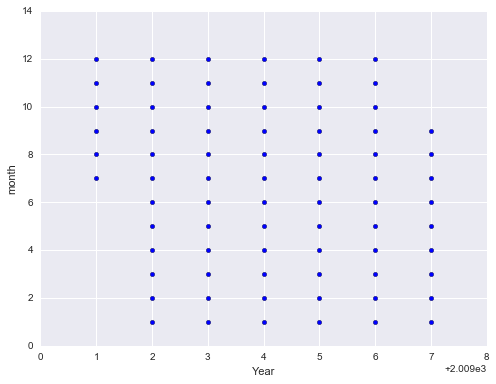

0.00310832440254
32.4676435833
5.00124217601
[-0.14430887 -0.05884875 -0.12822241 -0.02250712 -0.19140271]


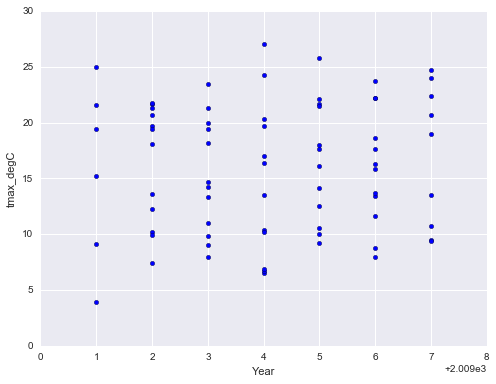

0.0016056266815
19.5157860954
3.90631043898
[-0.14416623 -0.05661344 -0.16544335 -0.02025734 -0.38458082]


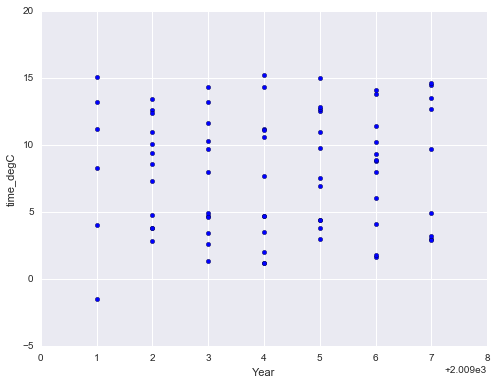

0.0215111593666
15.1798844781
2.79894559966
[ 0.01288522 -0.01482842 -0.00400814 -0.04466369 -0.15137003]


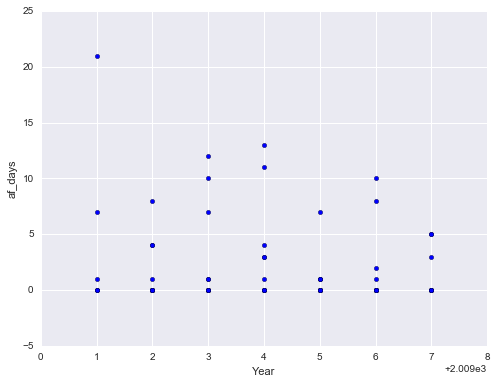

0.00799088270142
968.387685423
25.2552199118
[-0.12275457 -0.01507296 -0.00076931 -0.05602314 -0.02011123]


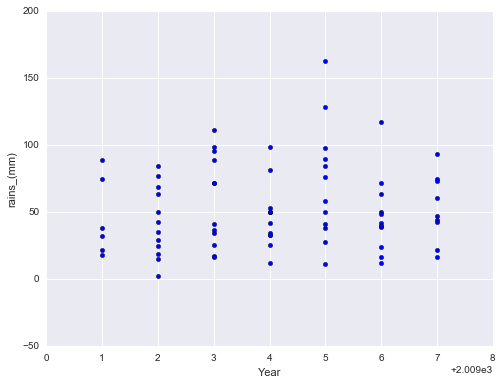

0.0133318417827
3495.59036102
51.4784204999
[-0.01544209 -0.00578398 -0.03345105 -0.13936769 -0.12750362]


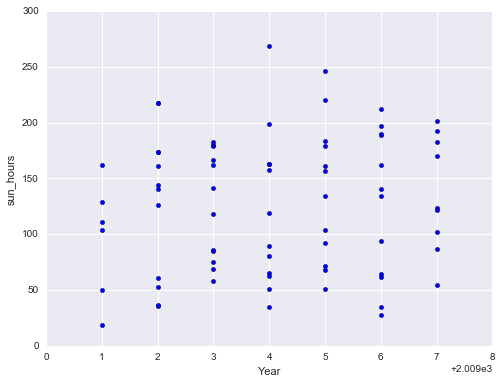

0.260211505855
42202853620.5
170296.848494
[-0.50229141 -0.37463753 -0.49578024 -0.23261084 -0.04106509]


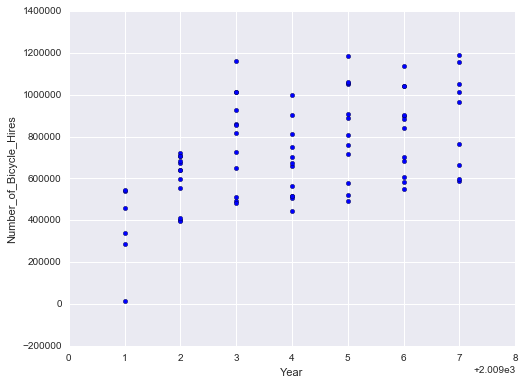

0.0553365794822
7.93416509137
2.32342785129
[-0.4881946  -0.34832702 -0.02681607 -0.08898886 -0.01500364]


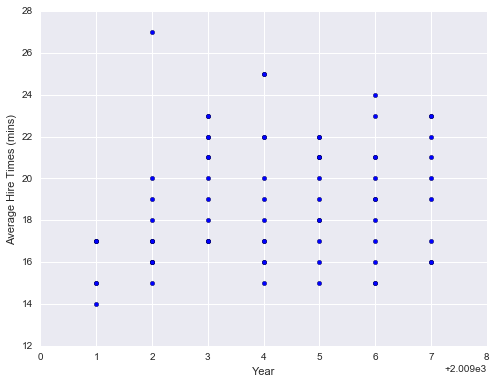

0.0410541819768
3.2466069615
1.56343089281
[-40.1263387  -14.87696186  -0.16664262  -9.60356679 -40.55220508]


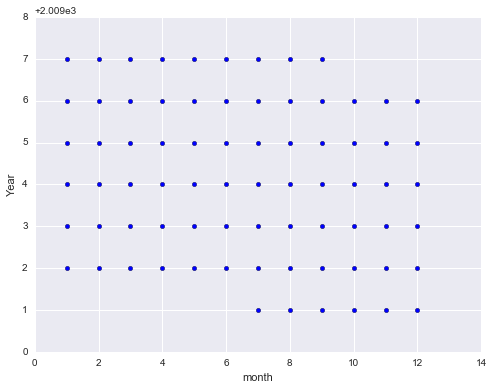

0.0571539878645
30.7074369515
4.8049491275
[-0.04635011 -0.28356249  0.02139563  0.0228349   0.01857944]


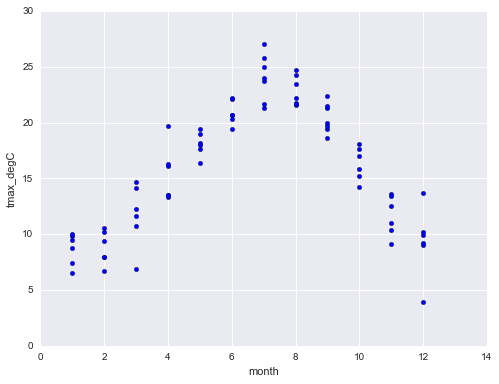

0.116397371202
17.2719321721
3.5498680126
[-0.06245061 -0.25010067  0.11066954  0.13399135  0.08002978]


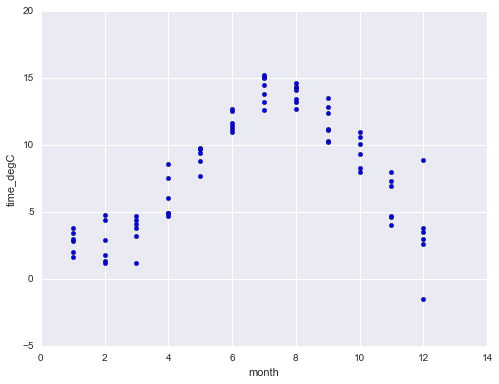

0.0258261324932
15.112943711
2.6954556366
[-0.18174476  0.0266046   0.05854865  0.04578505 -0.26844091]


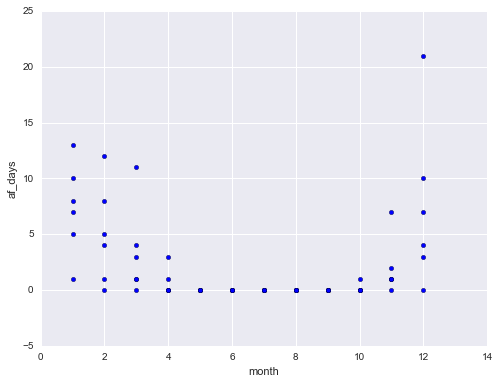

0.00364646241008
972.628657645
25.295181239
[-0.14431961 -0.01038772 -0.05036022 -0.0005943  -0.10943916]


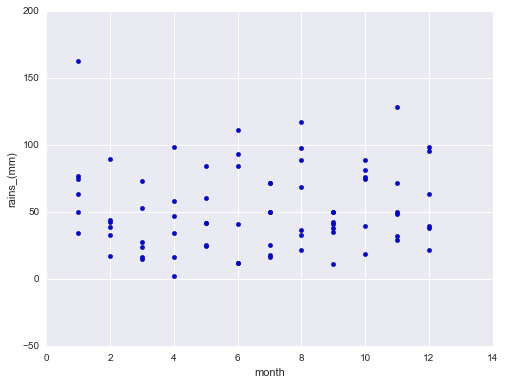

0.0113284769213
3502.68792755
51.0059569753
[ 0.01166941 -0.0078034  -0.14894179 -0.15625757  0.01968236]


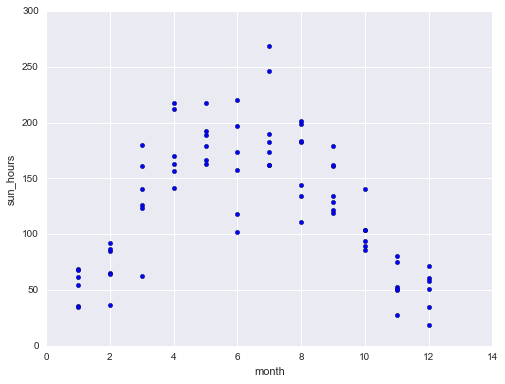

0.00966857328251
56495623503.6
195234.192464
[-2.3110105  -0.02455907 -0.28173709 -0.66367721 -0.79710757]


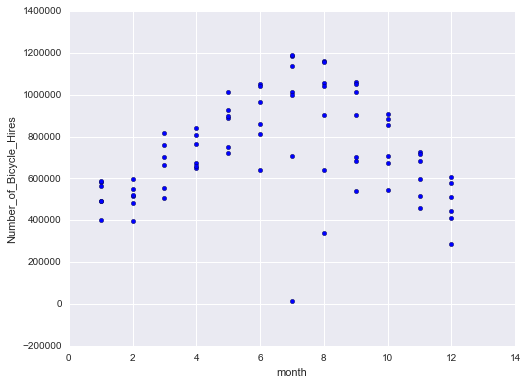

0.000149724516973
8.3976758071
2.46526698058
[-0.63309976 -0.11792321 -0.01856405 -0.01976171 -0.18651258]


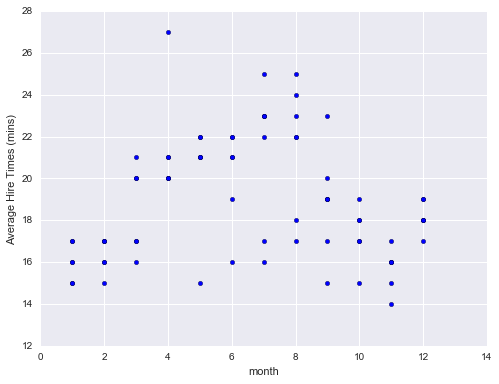

0.00310832440254
3.3750764569
1.56924257071
[-42.20744031 -16.80947254  -0.58765074 -10.67316951 -40.54866667]


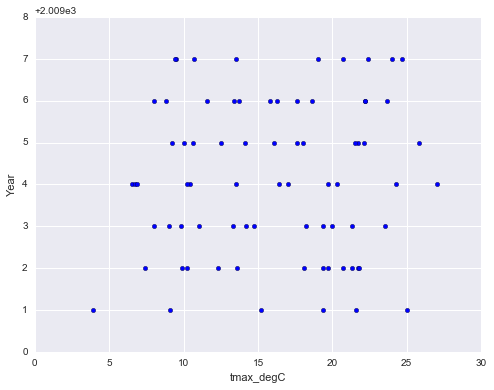

0.0571539878645
10.8927628346
2.79490217446
[-0.09440399 -0.15575395  0.03791131  0.02473713  0.12573507]


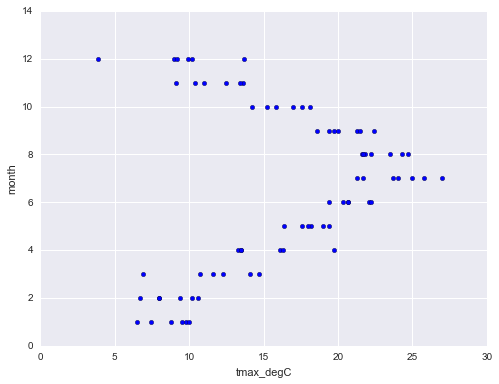

0.946730968038
1.04125890636
0.797550435442
[ 0.94938241  0.93861828  0.95006941  0.9385818   0.92753361]


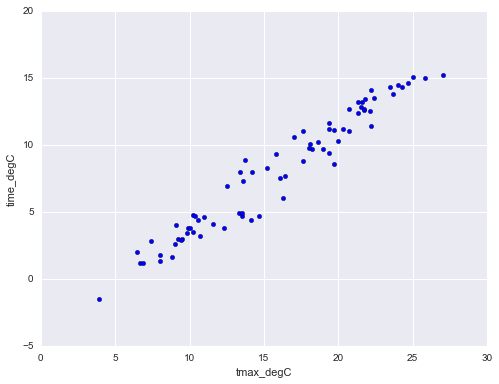

0.510330647835
7.59653446175
1.99629930301
[ 0.50286461  0.51058853  0.3396147   0.59938739 -0.14304937]


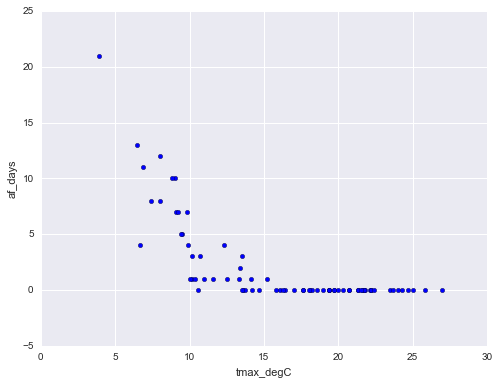

0.015523134542
961.034789367
25.1919183394
[-0.212908   -0.0026304   0.00325648  0.00847163 -0.06430163]


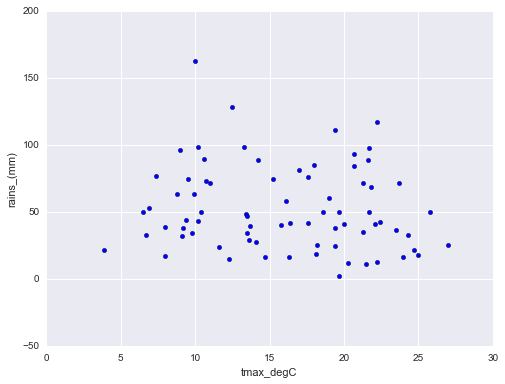

0.630368811045
1309.53777162
29.2120105827
[ 0.67219516  0.63730938  0.75106009  0.55791743  0.30942408]


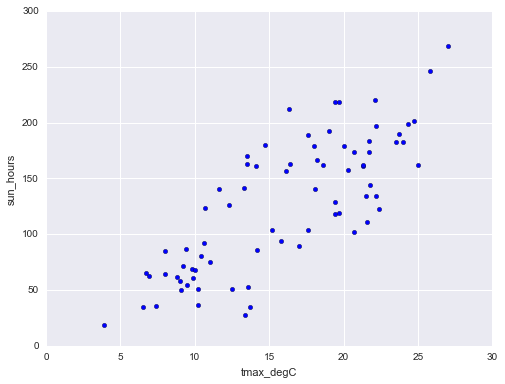

0.436366526531
32153704963.8
127126.545459
[-3.49488489  0.64163563  0.77678182  0.38956116  0.30861101]


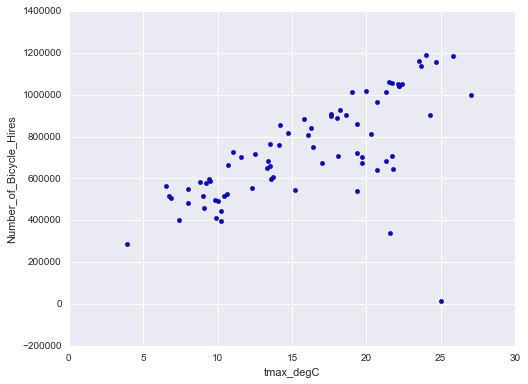

0.377158025989
5.23120821692
1.81480649539
[-1.16664576  0.23954412  0.59983837  0.68359001  0.63021897]


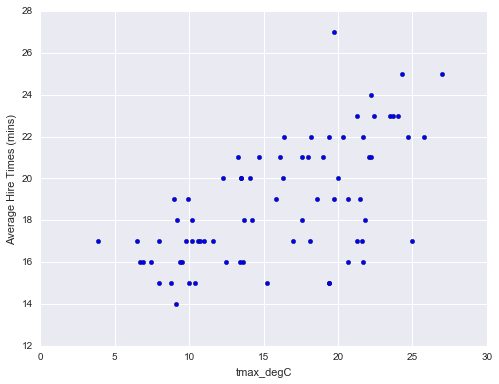

0.0016056266815
3.38016399031
1.56831828628
[-42.17085401 -16.94100848  -0.45197455 -10.880111   -41.48535425]


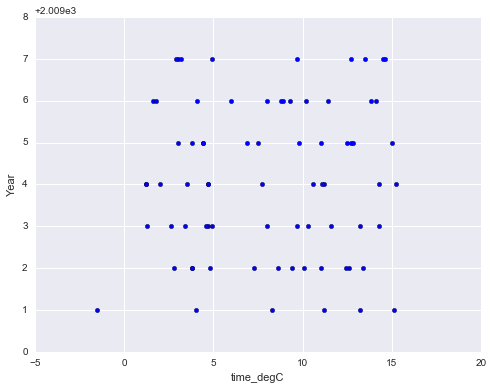

0.116397371202
10.2083200773
2.65116233469
[-0.12785339 -0.14089721  0.13825644  0.12125808  0.25927805]


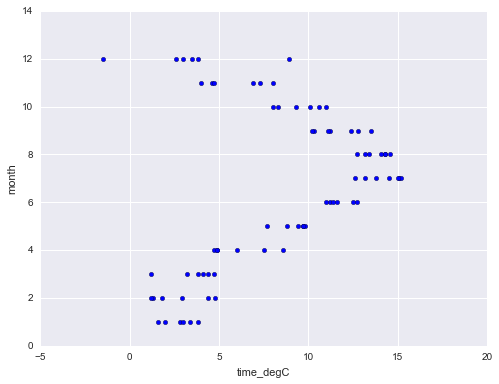

0.946730968038
1.73491261498
1.01369793304
[ 0.94916855  0.93699493  0.94995493  0.93755527  0.92991633]


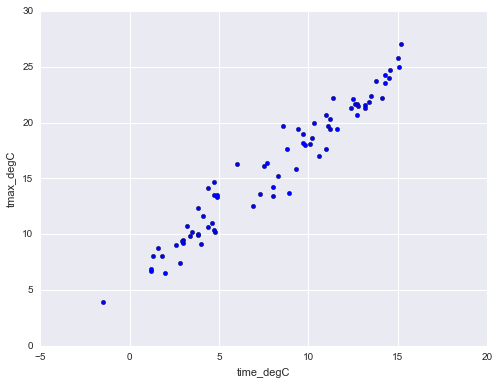

0.503201359918
7.70713538277
2.04145404157
[ 0.49014343  0.5057676   0.32495052  0.60158774 -0.1417795 ]


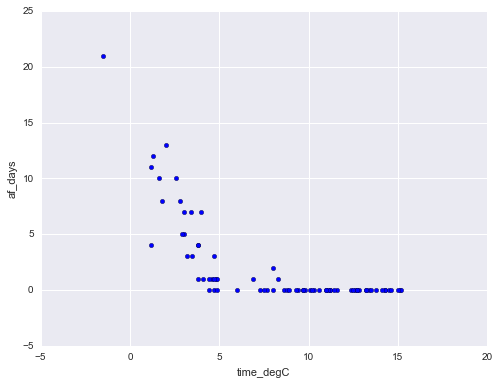

0.00103655146944
975.176422147
25.2967032171
[-0.18629222 -0.00782384 -0.06283541 -0.00812777 -0.03239741]


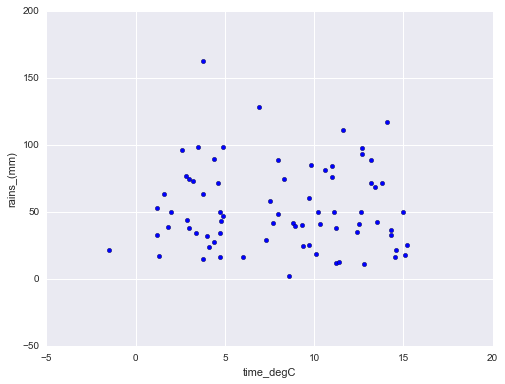

0.425764599808
2034.41421834
37.0474950005
[ 0.47550168  0.40394004  0.56447061  0.31896206  0.03892377]


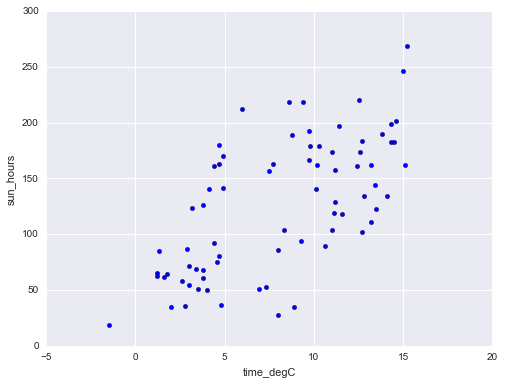

0.393925528217
34574844591.6
134129.906354
[-3.49809009  0.6020344   0.69734576  0.2561113   0.27470209]


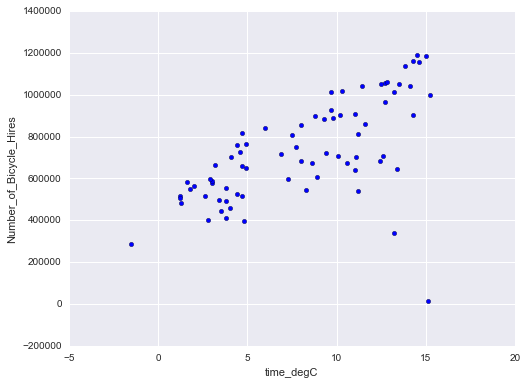

0.281045061077
6.03845460169
2.04232979885
[-1.23372472  0.15630937  0.45115562  0.5481911   0.51776288]


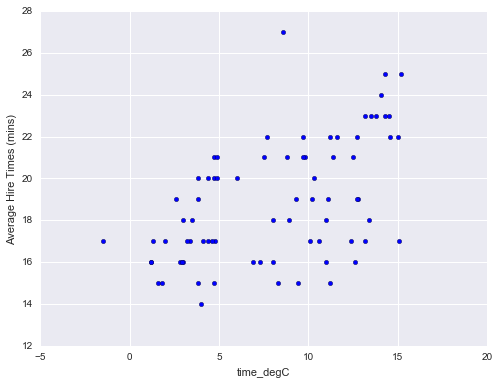

0.0215111593666
3.31277181885
1.5595379538
[-40.18483851 -17.33110494  -0.4006398  -10.96843219 -39.06110277]


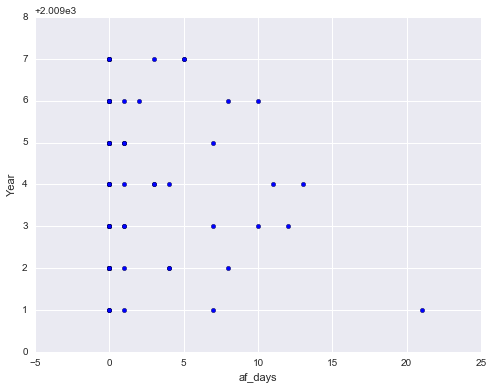

0.0258261324932
11.2546956362
2.85209754309
[-0.73679723 -0.05194085 -0.04661074  0.02928481  0.06264937]


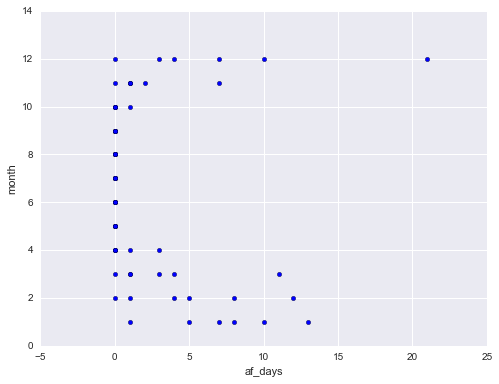

0.510330647835
15.9479814998
3.3524996333
[ 0.54070518  0.48074539  0.33232047  0.56873479  0.38459905]


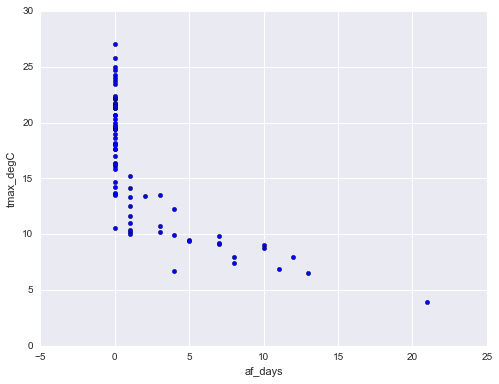

0.503201359918
9.71100824624
2.59513192153
[ 0.52210131  0.48097301  0.27391937  0.57644534  0.35240644]


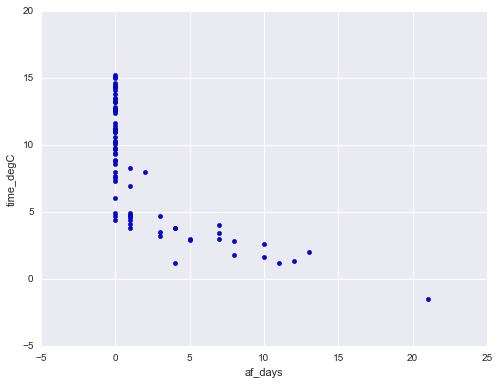

0.00506016006401
971.248622548
25.3833883388
[-0.11696637 -0.00521378 -0.01533084 -0.00156287 -0.02627062]


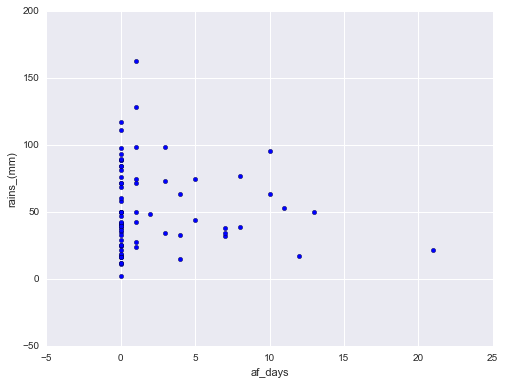

0.337161270947
2348.32010427
39.5155837917
[ 0.44091754  0.23403432  0.28559083  0.27131444  0.14318692]


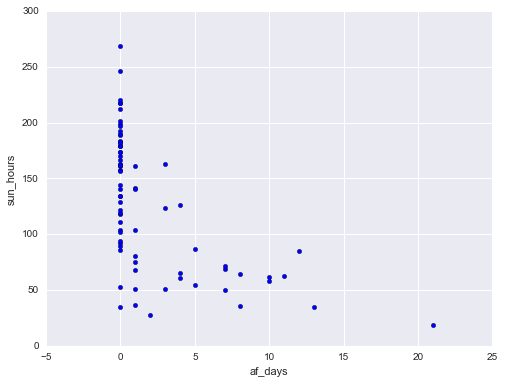

0.259225890499
42259080205.4
158734.030788
[-2.12690313  0.42451663 -0.20226368 -0.08564866 -0.28405638]


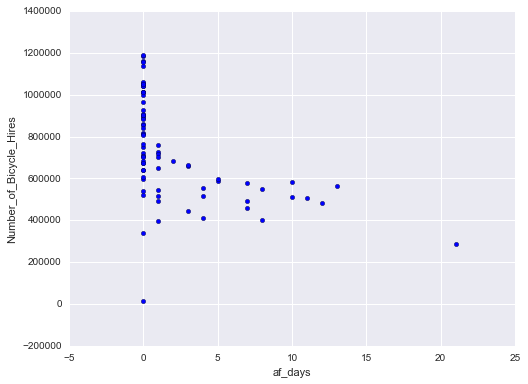

0.145251844804
7.17897277228
2.28357535754
[-0.76469801  0.02281199  0.14877855  0.36733914  0.12376715]


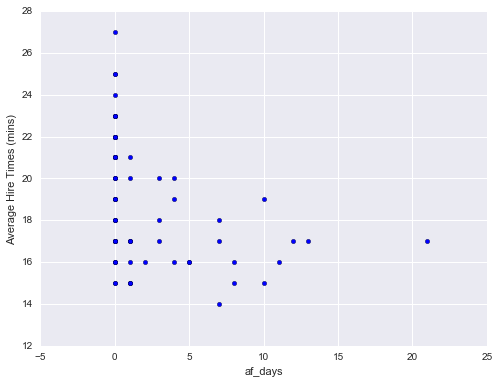

0.00799088270142
3.35854606753
1.55500700712
[-41.26386577 -17.31524315   0.21533069 -11.69375757 -39.72331242]


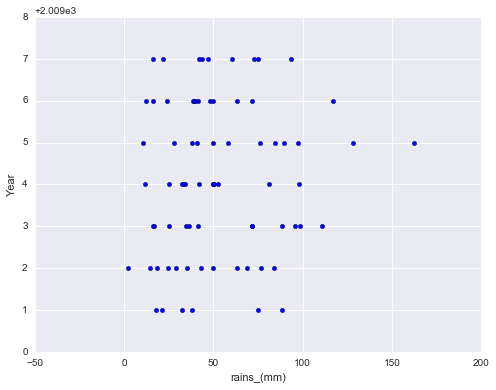

0.00364646241008
11.5109388433
2.92481390554
[-0.0161893  -0.08984433 -0.16432626 -0.02016997 -0.0680758 ]


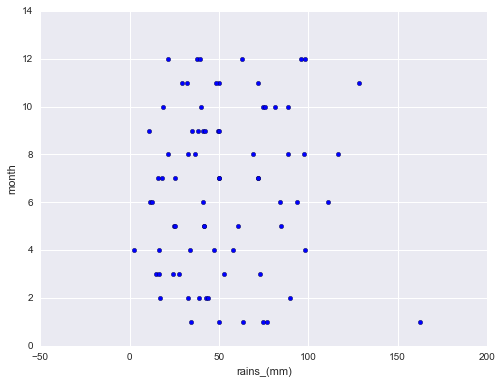

0.015523134542
32.0633071437
4.9366620794
[-0.04841146 -0.07905649 -0.09973496 -0.01530481 -0.14122313]


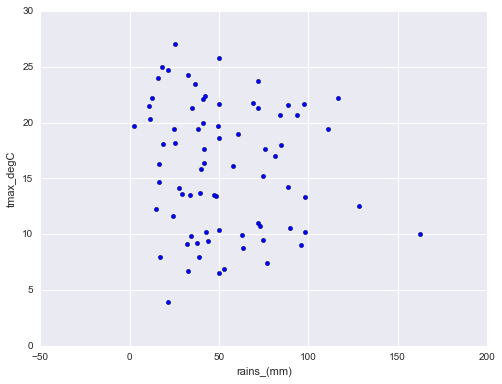

0.00103655146944
19.5269099062
3.89395566677
[-0.04781169 -0.06492343 -0.22949585 -0.01491079 -0.19105321]


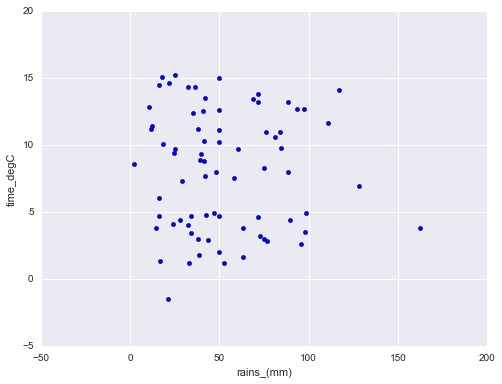

0.00506016006401
15.4350987008
2.80177945454
[-0.02158336 -0.00674601 -0.0226104  -0.01670634 -0.58709404]


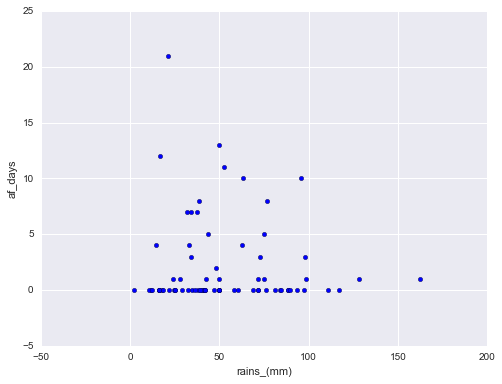

0.0918016621536
3217.58569913
47.6662063051
[ 0.0183446  -0.01294034  0.19269445 -0.07547465 -0.01182933]


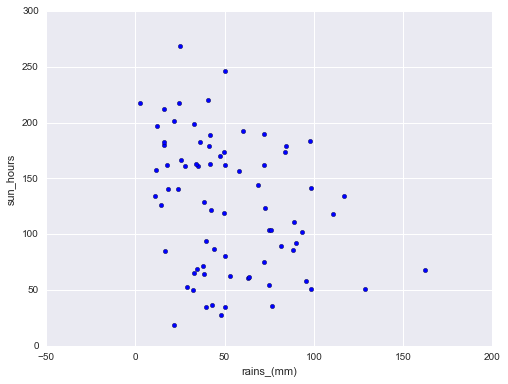

0.00390997010091
56824135624.3
195260.24593
[-2.41894832 -0.01811334 -0.49136162 -0.66914419 -0.85044031]


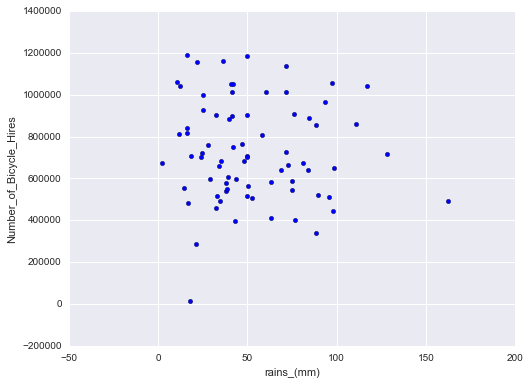

0.0267651543972
8.17413458589
2.40871174916
[-0.50784716 -0.38518751  0.02218911 -0.01939107 -0.22134135]


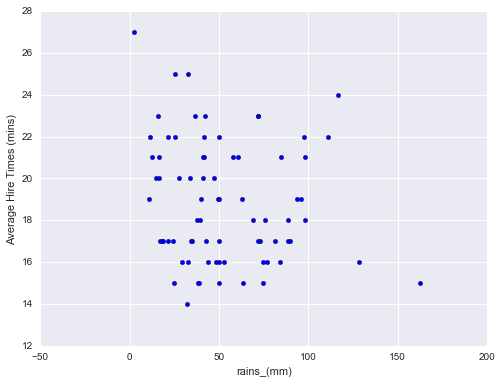

0.0133318417827
3.34046371646
1.56807476014
[-40.95731913 -16.25715759  -0.85418201  -9.98117522 -40.16761404]


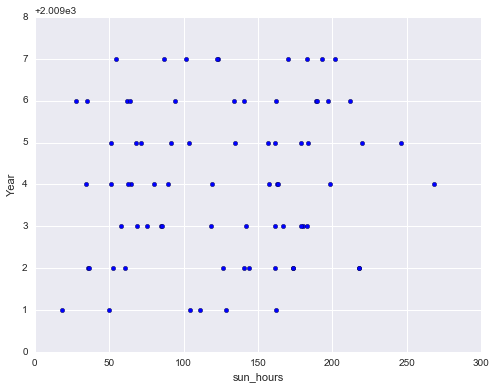

0.0113284769213
11.4221880176
2.91613917989
[ 0.00616582 -0.05756669 -0.22755068  0.00905806  0.01167878]


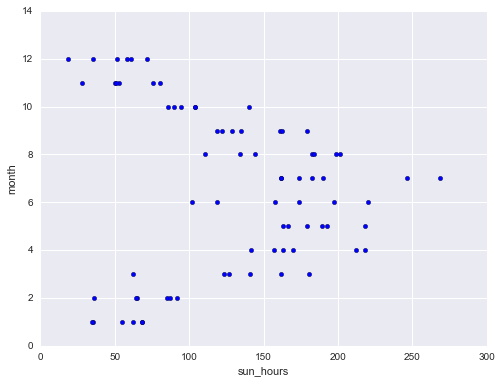

0.630368811045
12.0384731802
2.99388752515
[ 0.66201963  0.63015158  0.69750873  0.61587157  0.26610168]


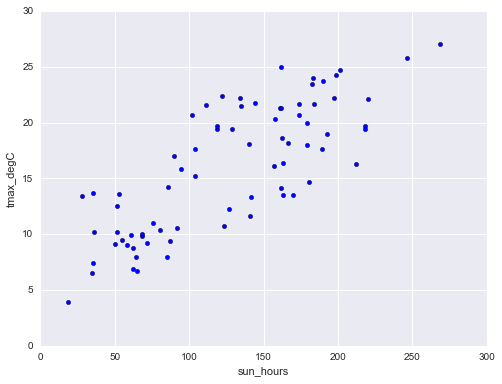

0.425764599808
11.2246778808
2.88945532022
[ 0.46501807  0.40017087  0.49614544  0.42096095 -0.02339136]


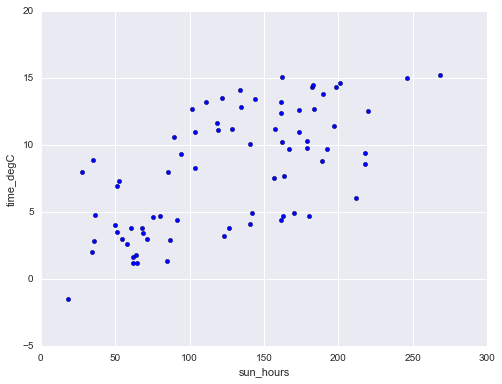

0.337161270947
10.283014907
2.21504408814
[ 0.34574019  0.29655922  0.28703944  0.44351275 -1.11526781]


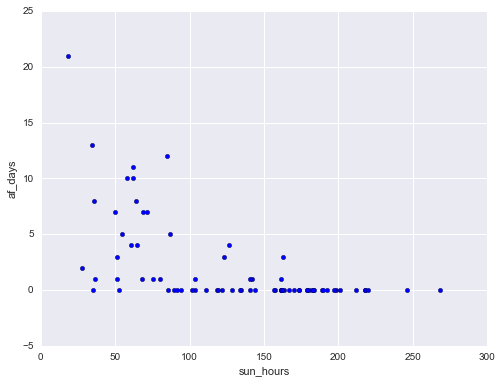

0.0918016621536
886.572583816
24.2202269712
[-0.15635757  0.06025926  0.16164347  0.088324   -0.08029759]


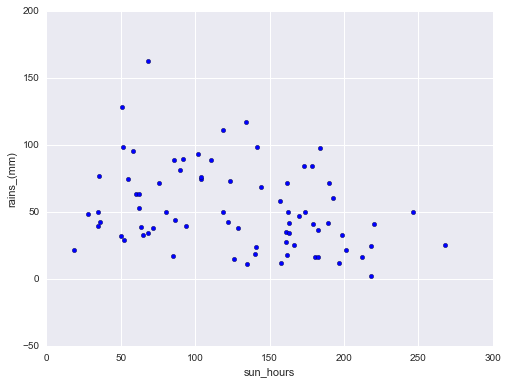

0.416444733087
33290187268.2
139004.995019
[-1.97693842  0.52201159  0.67520169  0.41040673 -0.28773833]


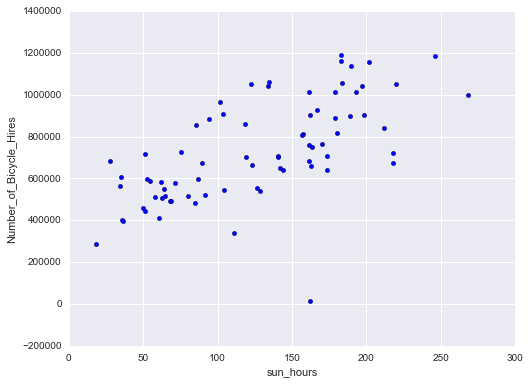

0.450061349134
4.61889806604
1.63556717035
[-0.51018959  0.3214315   0.69316526  0.74178163  0.34685927]


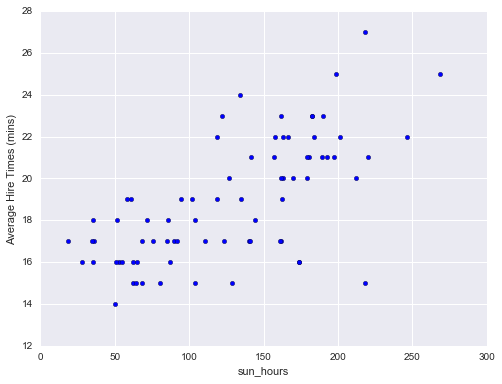

0.260211505855
2.50462792578
1.34064740576
[-28.08671205 -23.87130026  -5.73067017  -7.587301   -28.07062677]


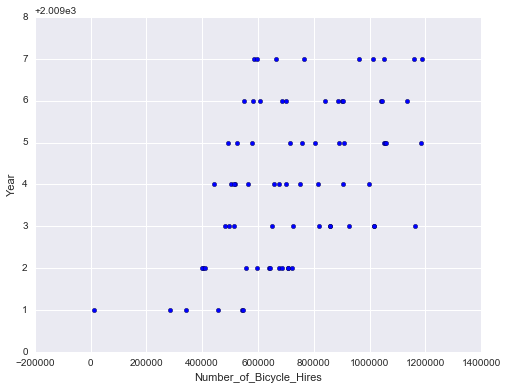

0.00966857328251
11.441364995
2.9091118271
[-0.17801631 -0.08902373 -0.08613431 -0.00972827  0.0243274 ]


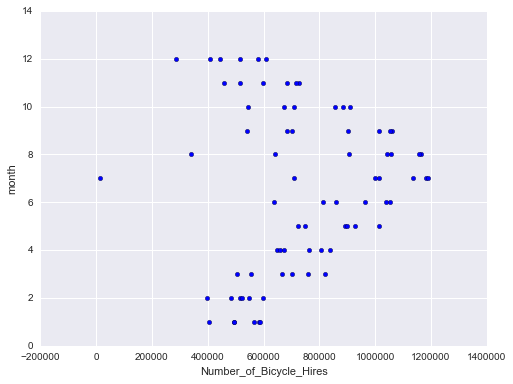

0.436366526531
18.3569099594
3.08639269439
[-1.59774222  0.66919169  0.50481164  0.69366565  0.75974187]


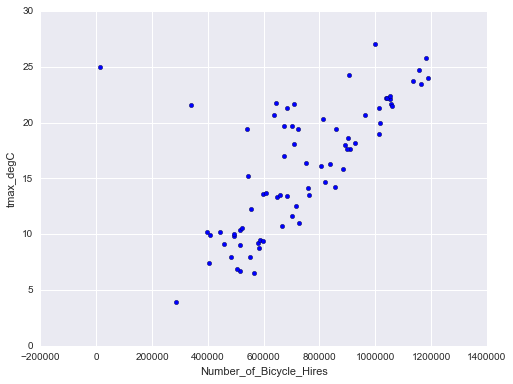

0.393925528217
11.8470416754
2.60357247845
[-1.74391933  0.58726645  0.45928296  0.60979416  0.66746531]


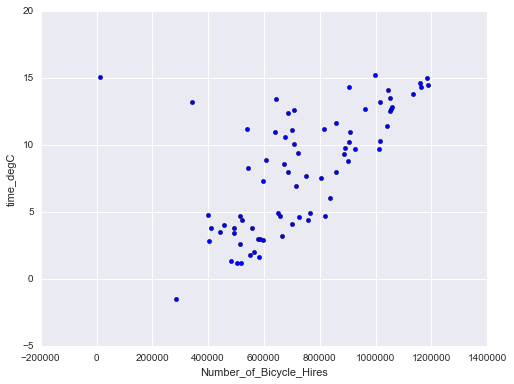

0.259225890499
11.4920732252
2.30796720317
[ 0.02729174  0.3899989   0.17579392  0.42620136  0.32626829]


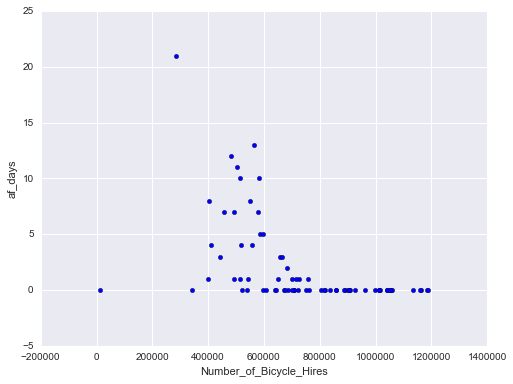

0.00390997010091
972.371424523
25.2542650884
[-0.45845832 -0.00926534 -0.04856591  0.00603385 -0.05823051]


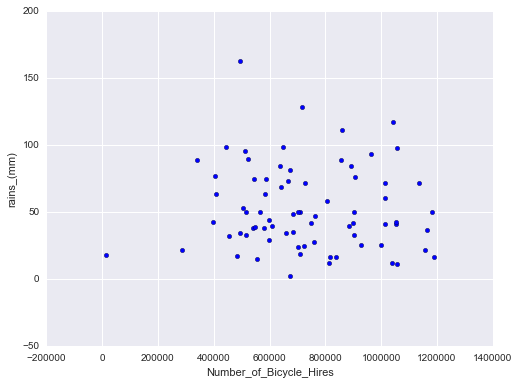

0.416444733087
2067.43285385
36.8773336846
[-0.53413804  0.53880997  0.53794478  0.52006608  0.18379625]


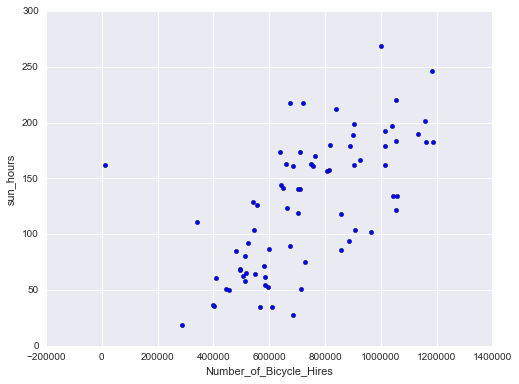

0.467025241239
4.47641946718
1.67220048086
[-0.20430122  0.4189106   0.49114306  0.4613033   0.70538243]


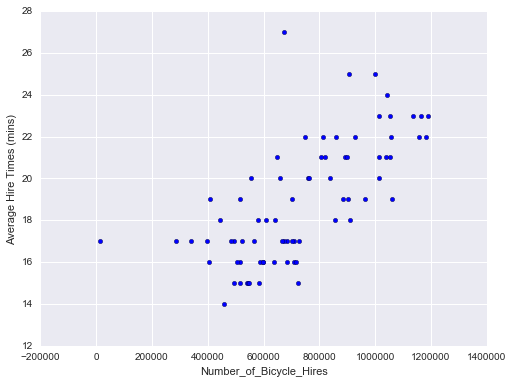

0.0553365794822
3.1982524765
1.56443992888
[-40.82130285 -20.19452659  -3.67219884 -11.21707567 -37.50001479]


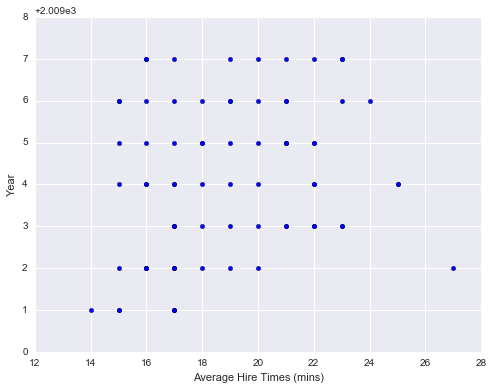

0.000149724516973
11.5513368893
2.93657437982
[-0.16966209 -0.09427482 -0.13159025 -0.02184147 -0.04355362]


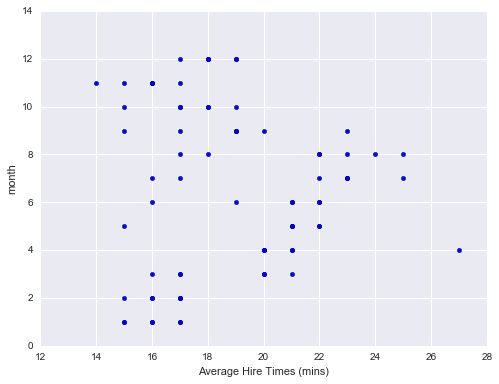

0.377158025989
20.2852644032
3.70529348348
[-0.97128801  0.2606292   0.52362664  0.58135787  0.67216012]


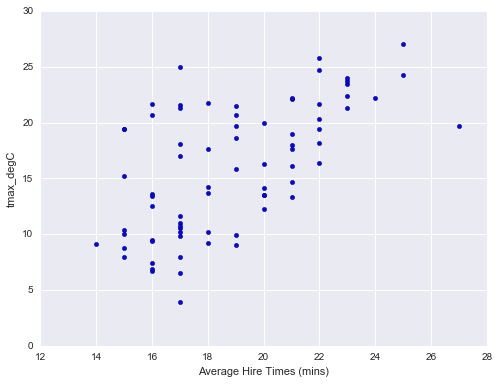

0.281045061077
14.0535355318
3.23932345554
[-1.11207885  0.19484767  0.37542242  0.46800596  0.47114446]


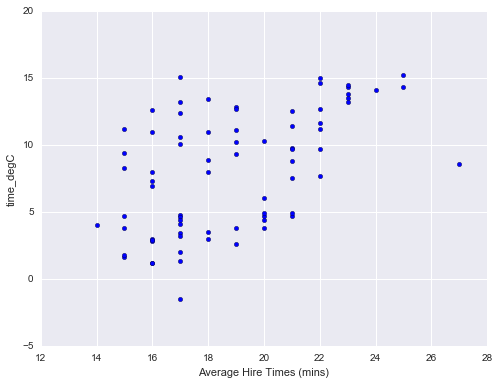

0.145251844804
13.2602209804
2.45861485056
[-0.05722877  0.11762876  0.13797999  0.35775692  0.32076609]


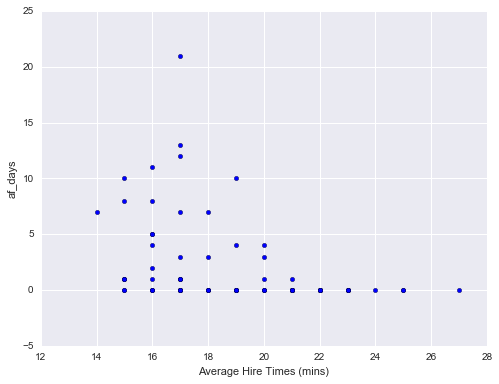

0.0267651543972
950.060461211
25.019443626
[-0.12806848 -0.14644111  0.00601089  0.0110322  -0.1473307 ]


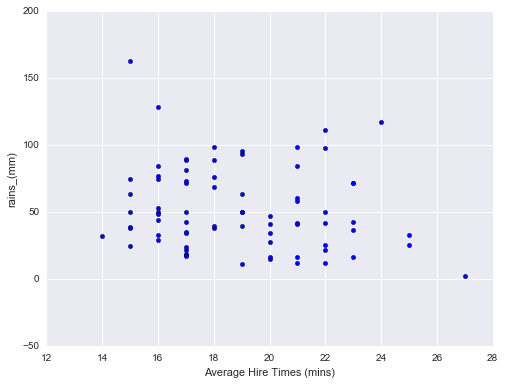

0.450061349134
1948.33514298
34.8701219202
[-0.38793989  0.3432126   0.71928351  0.48641234  0.43058105]


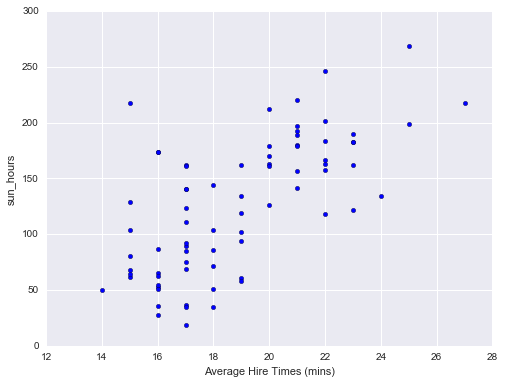

0.467025241239
30404711489.0
133257.824202
[-1.23470938  0.46416979  0.3916869   0.1032398   0.32154431]


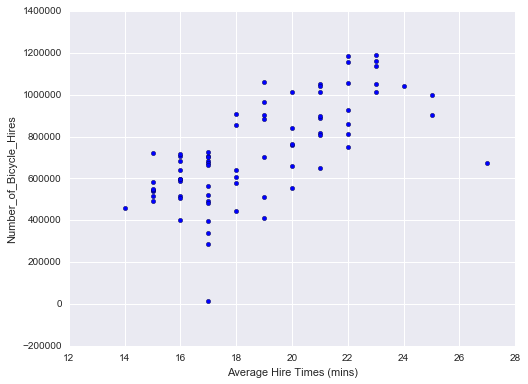

In [4]:
reg = LR()
for feat in list(df.columns):
    for lab in list(df.columns):
        if feat != lab:
            feature = df[feat].values.reshape(-1,1)
            label = df[lab].values.reshape(-1,1)
            scores = cross_val_score(reg, feature, label, cv=5)
            model = reg.fit(feature,label)
            pred = model.predict(feature)
            print r2_score(label, pred)
            print mean_squared_error(label,pred)
            print mean_absolute_error(label, pred)
            print scores
            fig = plt.figure(figsize={8,6})
            ax = fig.add_subplot(111)
            ax.scatter(df[feat], df[lab])
            ax.set(xlabel = feat, ylabel = lab)
            plt.show()

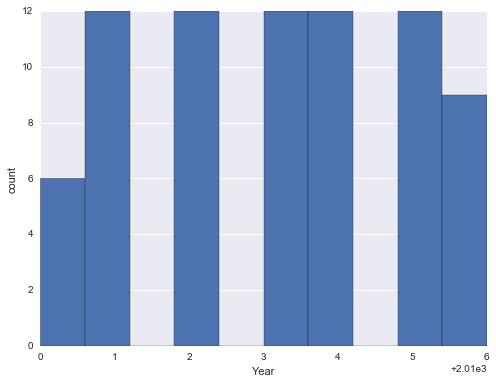

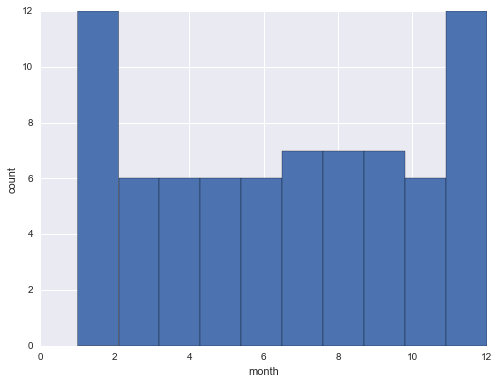

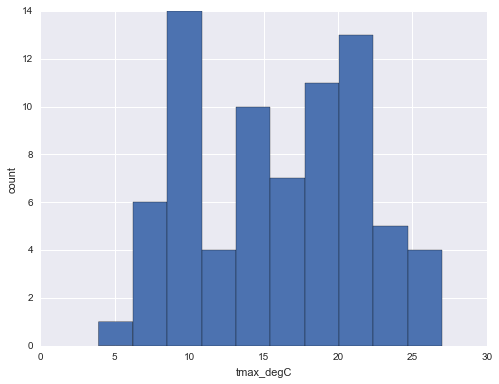

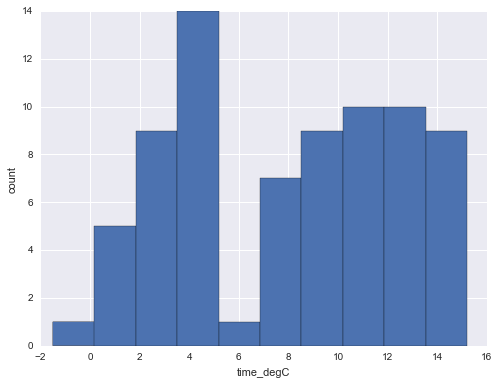

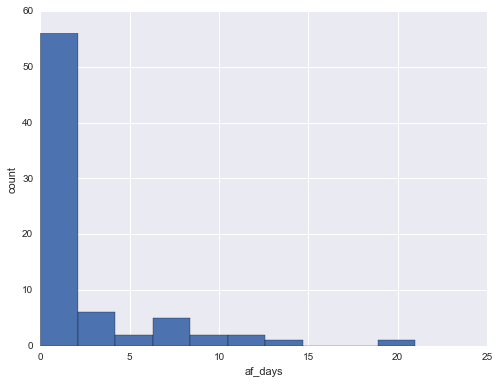

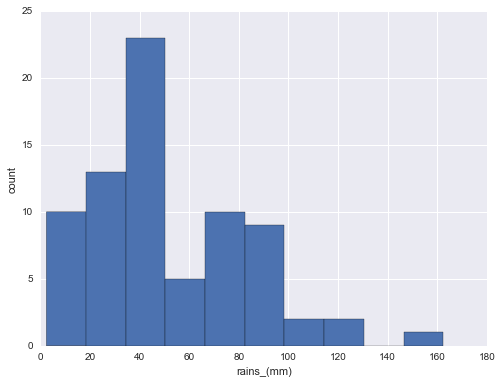

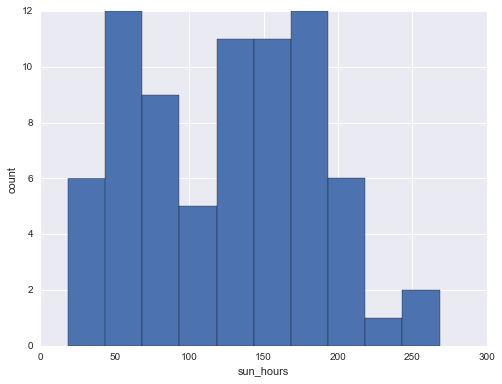

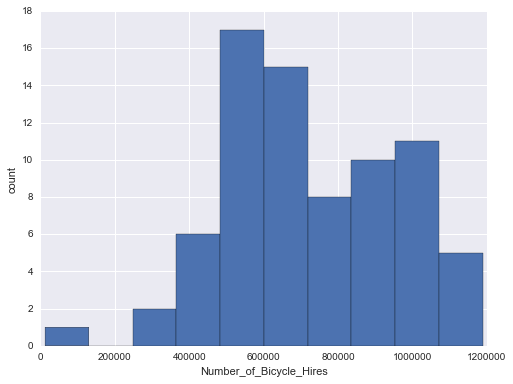

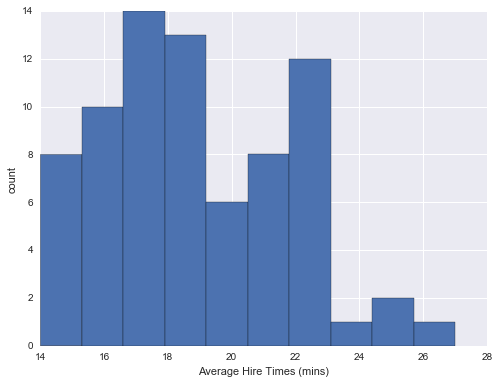

In [5]:
for feat in df:
    
    fig = plt.figure(figsize={8,6})
    ax = fig.add_subplot(111)
    ax.hist(df[feat])
    ax.set(xlabel = feat, ylabel = 'count')
    plt.show()

tmax_degC
Number_of_Bicycle_Hires

0.436366526531
32153704963.8
127126.545459
[-1.23470938  0.46416979  0.3916869   0.1032398   0.32154431]

----------------



/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


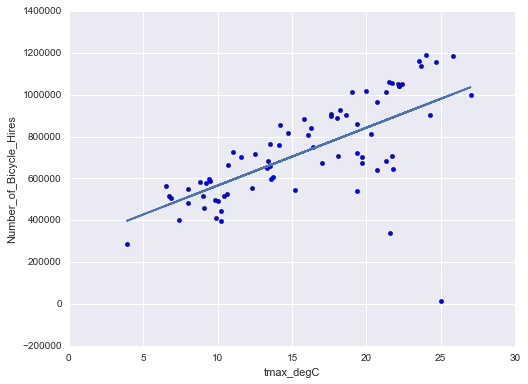

tmax_degC
Average Hire Times (mins)

0.377158025989
5.23120821692
1.81480649539
[-1.23470938  0.46416979  0.3916869   0.1032398   0.32154431]

----------------



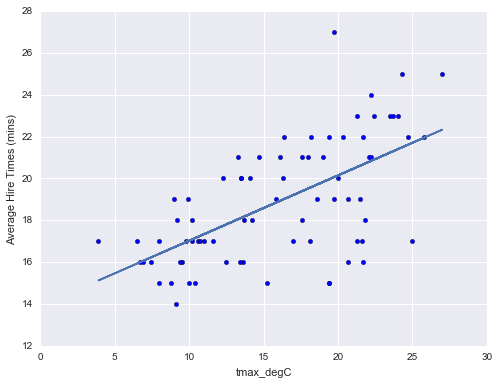

sun_hours
Number_of_Bicycle_Hires

0.416444733087
33290187268.2
139004.995019
[-1.23470938  0.46416979  0.3916869   0.1032398   0.32154431]

----------------



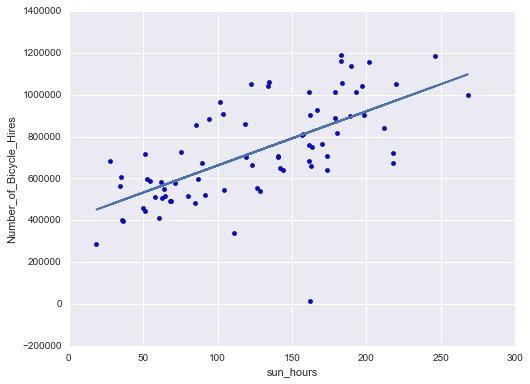

sun_hours
Average Hire Times (mins)

0.450061349134
4.61889806604
1.63556717035
[-1.23470938  0.46416979  0.3916869   0.1032398   0.32154431]

----------------



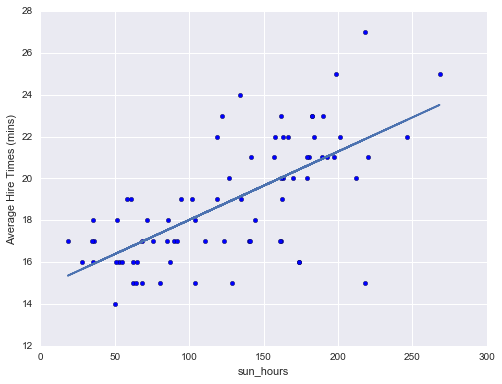

In [6]:
from sklearn.linear_model import LassoCV, RidgeCV
feat_df = df[['tmax_degC', 'sun_hours' ]]
lab_df = df[['Number_of_Bicycle_Hires', 'Average Hire Times (mins)']]
#poly = PF(2)
#feature = poly.fit_transform(df['month'].reshape(-1,1))
#feature = -np.power(df['month'],[2]).values.reshape(-1,1)

Las = LassoCV()
Rid = RidgeCV()
for f in feat_df:
    for l in lab_df:
    
        features = feat_df[f].reshape(-1,1)
        labels = lab_df[l]
        model = reg.fit(features,labels)
        pred = model.predict(features)
        print f
        print l
        print ''
        print r2_score(labels, pred)
        print mean_squared_error(labels,pred)
        print mean_absolute_error(labels, pred)
        print scores
        print ''
        print '----------------'
        print ''
        fig = plt.figure(figsize={8,6})
        ax = fig.add_subplot(111)
        ax.scatter(features, labels)
        ax.set(xlabel = f, ylabel = l)
        ax.plot(features,pred)
        plt.show()

In [10]:
feat_df = df[['tmax_degC', 'sun_hours' ]]
lab_df = df[['Number_of_Bicycle_Hires', 'Average Hire Times (mins)']]
features = feat_df
labels = lab_df['Number_of_Bicycle_Hires']
model = Las.fit(features,labels)
pred = model.predict(features)

print 'Lasson Number_of_Bicycle_Hires'
print ''
print r2_score(labels, pred)
print mean_squared_error(labels,pred)
print mean_absolute_error(labels, pred)
print scores
print ''
print '----------------'
print ''

features = feat_df
labels = lab_df['Number_of_Bicycle_Hires']
model = Rid.fit(features,labels)
pred = model.predict(features)

print 'Ridge Number_of_Bicycle_Hires'
print ''
print r2_score(labels, pred)
print mean_squared_error(labels,pred)
print mean_absolute_error(labels, pred)
print scores
print ''
print '----------------'
print ''

Lasson Number_of_Bicycle_Hires

0.415547530108
33341370175.7
139635.754719
[-1.23470938  0.46416979  0.3916869   0.1032398   0.32154431]

----------------

Ridge Number_of_Bicycle_Hires

0.475872635977
29899992494.3
121690.752041
[-1.23470938  0.46416979  0.3916869   0.1032398   0.32154431]

----------------



In [8]:
features = feat_df
labels = lab_df['Average Hire Times (mins)']
model = Las.fit(features,labels)
pred = model.predict(features)

print 'Lasso Average Hire Times (mins)'
print ''
print r2_score(labels, pred)
print mean_squared_error(labels,pred)
print mean_absolute_error(labels, pred)
print scores
print ''
print '----------------'
print ''

features = feat_df
labels = lab_df['Average Hire Times (mins)']
model = Rid.fit(features,labels)
pred = model.predict(features)

print 'Ridge Average Hire Times (mins)'
print ''
print r2_score(labels, pred)
print mean_squared_error(labels,pred)
print mean_absolute_error(labels, pred)
print scores
print ''
print '----------------'
print ''

Lasso Average Hire Times (mins)

0.449578763102
4.62295127396
1.63738405899
[-1.23470938  0.46416979  0.3916869   0.1032398   0.32154431]

----------------

Ridge Average Hire Times (mins)

0.468025946483
4.46801461056
1.61807240352
[-1.23470938  0.46416979  0.3916869   0.1032398   0.32154431]

----------------

